In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/shaikmohammadasrarahammad/Downloads/Crescent_subjects/sem6/DataAnalytics/twitterSentimentAnalysis/data/Tweets.csv')

In [3]:
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
data.drop(columns=['textID'],inplace=True)

In [5]:
data.shape

(27481, 3)

In [6]:
data.isnull().sum()

text             1
selected_text    1
sentiment        0
dtype: int64

In [7]:
data.dropna(axis=0, inplace=True)

In [8]:
data.isnull().sum()

text             0
selected_text    0
sentiment        0
dtype: int64

In [9]:
data.shape

(27480, 3)

In [10]:
data.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [11]:
sentiments = data['sentiment'].value_counts()

In [12]:
sentiments

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

In [13]:
neutral = sentiments[0]
positive = sentiments[1]
negative = sentiments[2]

In [14]:
import matplotlib.pyplot as plt

# Barchart
`plt.bar(labels, heights, color)` can be used to plot barchar. In the drawn barchart tweets from data are more neutral.

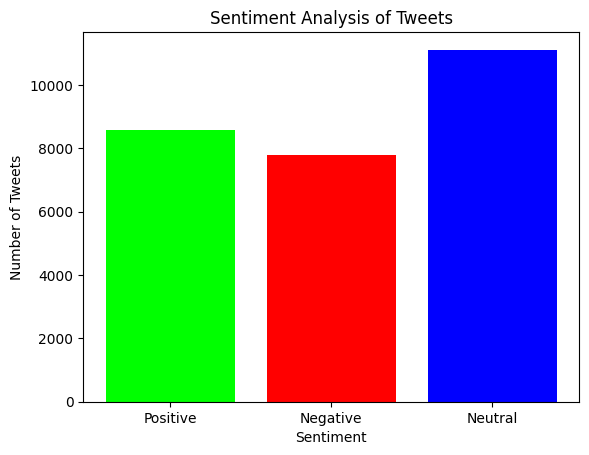

In [15]:
# create a bar chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
colors = ['#00ff00', '#ff0000', '#0000ff']

plt.bar(labels, sizes, color=colors)
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

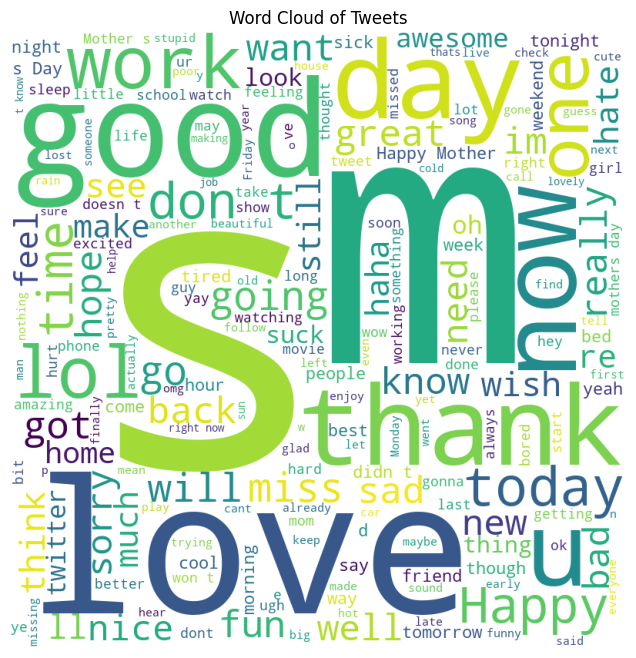

In [16]:
# create a word cloud
from wordcloud import WordCloud

all_words = data['selected_text']
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

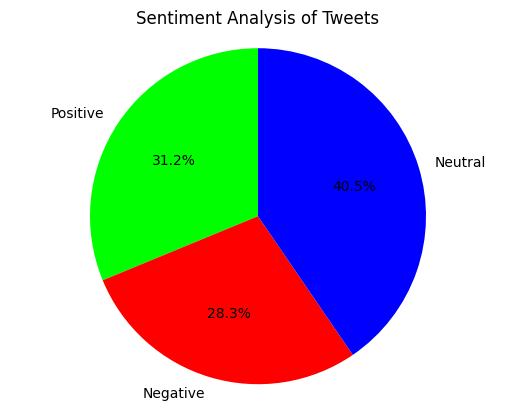

In [17]:
# plot the data
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
colors = ['#00ff00', '#ff0000', '#0000ff']

plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sentiment Analysis of Tweets')
plt.show()

In [18]:
data.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


# Removing punctuations

In [19]:
import string
exclude = string.punctuation
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,"")
    return text

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
data['selected_text'] = data['selected_text'].apply(remove_punc)

In [22]:
data['text'] = data['text'].apply(remove_punc)

In [23]:
data.head()

,text,selected_text,sentiment
0,Id have responded if I were going,Id have responded if I were going,neutral
1,Sooo SAD I will miss you here in San Diego,Sooo SAD,negative
2,my boss is bullying me,bullying me,negative
3,what interview leave me alone,leave me alone,negative
4,Sons of why couldnt they put them on the rel...,Sons of,negative


# Lower casing data

In [24]:
data['selected_text'] = data['selected_text'].str.lower()

In [25]:
data['text'] = data['text'].str.lower()

In [26]:
data.head()

,text,selected_text,sentiment
0,id have responded if i were going,id have responded if i were going,neutral
1,sooo sad i will miss you here in san diego,sooo sad,negative
2,my boss is bullying me,bullying me,negative
3,what interview leave me alone,leave me alone,negative
4,sons of why couldnt they put them on the rel...,sons of,negative


# Remove HTML tags

In [27]:
import re
def remove_tag(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [28]:
data['selected_text'] = data['selected_text'].apply(remove_tag)
data['text'] = data['text'].apply(remove_tag)

In [29]:
data.head()

,text,selected_text,sentiment
0,id have responded if i were going,id have responded if i were going,neutral
1,sooo sad i will miss you here in san diego,sooo sad,negative
2,my boss is bullying me,bullying me,negative
3,what interview leave me alone,leave me alone,negative
4,sons of why couldnt they put them on the rel...,sons of,negative


# Stemming

In [30]:
import nltk
from nltk.stem import PorterStemmer

def stem_column(data, column_name):
    # Initialize PorterStemmer
    stemmer = PorterStemmer()

    # Apply stemming to each row in the column
    stemmed_data = []
    for text in data[column_name]:
        # Tokenize text
        words = nltk.word_tokenize(text)

        # Apply stemming to each word
        stemmed_words = [stemmer.stem(word) for word in words]

        # Join stemmed words into a single string and append to list
        stemmed_data.append(' '.join(stemmed_words))

    # Add stemmed column to original data and return
    data[column_name + '_stemmed'] = stemmed_data
    data.drop(columns=[column_name],inplace=True)
    return data

In [31]:
stem_column(data=data,column_name='selected_text')
stem_column(data=data, column_name='text')

,sentiment,selected_text_stemmed,text_stemmed
0,neutral,id have respond if i were go,id have respond if i were go
1,negative,sooo sad,sooo sad i will miss you here in san diego
2,negative,bulli me,my boss is bulli me
3,negative,leav me alon,what interview leav me alon
4,negative,son of,son of whi couldnt they put them on the releas...
...,...,...,...
27476,negative,d lost,wish we could come see u on denver husband los...
27477,negative,dont forc,ive wonder about rake to the client ha made it...
27478,positive,yay good for both of you,yay good for both of you enjoy the break you p...
27479,positive,but it wa worth it,but it wa worth it


In [32]:
data.head()

,sentiment,selected_text_stemmed,text_stemmed
0,neutral,id have respond if i were go,id have respond if i were go
1,negative,sooo sad,sooo sad i will miss you here in san diego
2,negative,bulli me,my boss is bulli me
3,negative,leav me alon,what interview leav me alon
4,negative,son of,son of whi couldnt they put them on the releas...


# Tokenization

In [33]:
data.head()

,sentiment,selected_text_stemmed,text_stemmed
0,neutral,id have respond if i were go,id have respond if i were go
1,negative,sooo sad,sooo sad i will miss you here in san diego
2,negative,bulli me,my boss is bulli me
3,negative,leav me alon,what interview leav me alon
4,negative,son of,son of whi couldnt they put them on the releas...


In [34]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer()

**Spliting text and labels.**

In [35]:
X = data['selected_text_stemmed']
y = data['sentiment']

In [36]:
X

0                     id have respond if i were go
1                                         sooo sad
2                                         bulli me
3                                     leav me alon
4                                           son of
                           ...                    
27476                                       d lost
27477                                    dont forc
27478                     yay good for both of you
27479                           but it wa worth it
27480    all thi flirt go on the atg smile yay hug
Name: selected_text_stemmed, Length: 27480, dtype: object

In [37]:
y

0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27480, dtype: object

**Spliting train and test data.**

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

**Applying TFIDF**

In [39]:
# X_train = tfidf.fit_transform(X_train)
# X_test = tfidf.transform(X_test)

In [40]:
# X_train

**Applying Word2vec**

In [41]:
import gensim
import nltk

def tokenize(data, column_name,words_sample):
    # Tokenize the text
    corpus = [nltk.word_tokenize(text) for text in data[column_name]]

    # Build the word2vec model
    model = gensim.models.Word2Vec(corpus, window=5, min_count=5, workers=4)

    # Find the most similar words to a given word
    similar_words = model.wv.most_similar(words_sample)

    # Get the vector representation of a word
    vector = model.wv[words_sample]

    return similar_words, vector


In [42]:
similar_words, vector = tokenize(data, 'selected_text_stemmed','close')

In [43]:
similar_words

[('red', 0.9979418516159058),
 ('stand', 0.9979315996170044),
 ('write', 0.9977330565452576),
 ('hold', 0.9974589347839355),
 ('safe', 0.9974544644355774),
 ('decid', 0.997442901134491),
 ('quick', 0.9974125623703003),
 ('money', 0.9973935484886169),
 ('their', 0.9973463416099548),
 ('onc', 0.9972572326660156)]

In [44]:
vector.shape

(100,)

# Count Vectorize

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the text data
X_train = vectorizer.fit_transform(X_train)

# Transform the text data into a sparse matrix of token counts
X_test = vectorizer.transform(X_test)


**Training Model**

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [47]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(X_test)
score = accuracy_score(y_test, y_pred)
score


0.8102862688015526